In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

# Data Load & Pre-processing

In [2]:
# input folder
data_root = os.path.join(os.getcwd(),'input')

In [3]:
from data_preprocessing import *

In [4]:
df = load_data_from_local(data_root)
df.head(5)

Meta data size: 9022
c:\Users\pywong\Desktop\PolyU\COMP5434 Big Data Computing\Assignment\COMP5434-Big-Data-Computing\input\subset\subset\document_parses\pdf_json
total json files: 12000


100%|██████████| 8083/8083 [00:38<00:00, 210.10it/s]


,doc_num,paper_id,publish_time,doi,abstract,body_text,authors,title,journal,abstract_summary,language,processed_title,processed_abstract,processed_text,processed_title_list,processed_abstract_list,processed_text_list,all_text_list
0,0,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,2022-02-02,10.1007/s40744-022-00425-0,Coronavirus disease 2019 caused by the severe ...,Systemic inflammation is the hallmark of coron...,"Drosos, Alexandros A.. Pelechas, Eleftherios...",Colchicine Against SARS-CoV-2 Infection: What ...,Rheumatol Ther,Coronavirus disease 2019 caused by the severe ...,en,,coronavirus disease caused severe acute respir...,systemic inflammation hallmark coronavirus dis...,[],"[coronavirus, disease, caused, severe, acute, ...","[systemic, inflammation, hallmark, coronavirus...","[coronavirus, disease, caused, severe, acute, ..."
1,1,0016a5c32e9cea6002cf6f352ecdb5231c7e3194,2020-07-16,10.30699/ijp.2020.127312.2387,,Severe acute respiratory syndrome coronavirus ...,"Abdollahi, Alireza. shakoori, Abbas...",Comparison of Patient-collected and Lab Techni...,Iran J Pathol,Severe acute respiratory syndrome coronavirus ...,en,collected collected,,severe acute respiratory syndrome coronavirus ...,"[collected, collected]",[],"[severe, acute, respiratory, syndrome, coronav...","[collected, collected, severe, acute, respirat..."
2,2,0020e5c796f50e927b96ff0b7ea375b4745261a3,2020-05-08,10.1186/s12887-020-02112-x,Background: One major limitation for less inva...,Respiratory Distress Syndrome (RDS) affects 85...,"Chevallier, Marie. Durrmeyer, Xavier...",Propofol versus placebo (with rescue with keta...,BMC Pediatr,Background: One major limitation for less inva...,en,versus placebo rescue ketamine invasive surfac...,background major limitation invasive surfactan...,respiratory distress syndrome affects preterm ...,"[versus, placebo, rescue, ketamine, invasive, ...","[background, major, limitation, invasive, surf...","[respiratory, distress, syndrome, affects, pre...","[versus, placebo, rescue, ketamine, invasive, ..."
3,3,00234390dbc45e3370ac8f80cbd93cec3777ca92,2021-03-26,10.1016/j.ajur.2021.03.006,Objective: To identify the impact of COVID-19 ...,The World Health Organization (WHO) has announ...,"Raheem Ali, Abdel. Ghazwani, Yahya...",Impact of COVID-19 on endourology surgical pra...,Asian J Urol,Objective: To identify the impact of COVID-19 ...,en,endourology surgical practice national multice...,objective identify impact endourology surgical...,world health organization announced novel coro...,"[endourology, surgical, practice, national, mu...","[objective, identify, impact, endourology, sur...","[world, health, organization, announced, novel...","[endourology, surgical, practice, national, mu..."
4,4,0025fd87cfaf7953079b618771218b8de6893928,2021-09-06,10.3389/fcell.2021.748905,,"The concept of specialized ""membrane microdoma...","Garofalo, Tina. Misasi, Roberta...",Editorial: Targeting Lipid Rafts as a Strategy...,Front Cell Dev Biol,"The concept of specialized ""membrane microdoma...",en,,,concept specialized membrane microdomains refe...,[],[],"[concept, specialized, membrane, microdomains,...","[concept, specialized, membrane, microdomains,..."


# Histogram of year / journal

In [5]:
start_year = 1970
end_year = 2022

In [6]:
df['publish_year'] = df['publish_time'].dt.year
mask = (df['publish_year'] >= start_year) & (df['publish_year'] <= end_year)
df = df.loc[mask]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8041 entries, 0 to 8040
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   doc_num                  8041 non-null   int64         
 1   paper_id                 8041 non-null   object        
 2   publish_time             8041 non-null   datetime64[ns]
 3   doi                      8041 non-null   object        
 4   abstract                 8041 non-null   object        
 5   body_text                8041 non-null   object        
 6   authors                  8041 non-null   object        
 7   title                    8041 non-null   object        
 8   journal                  8041 non-null   object        
 9   abstract_summary         8041 non-null   object        
 10  language                 8041 non-null   object        
 11  processed_title          8041 non-null   object        
 12  processed_abstract       8041 non-null 

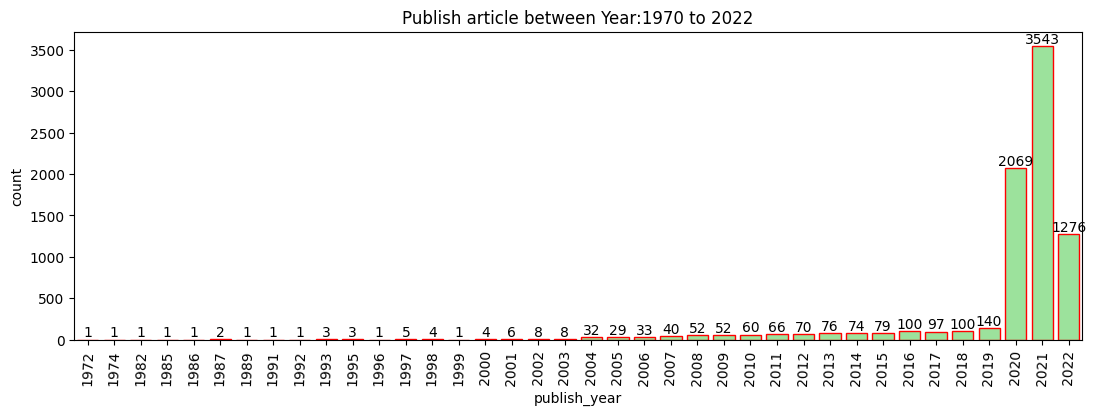

In [7]:
plt.figure(figsize=(13,4))
ax = sns.countplot(x='publish_year', data=df, color='lightgreen', edgecolor='red',)
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', rotation=88)
plt.title('Publish article between Year:' + str(start_year) + ' to ' + str(end_year))
plt.show()

# Histogram of Journal

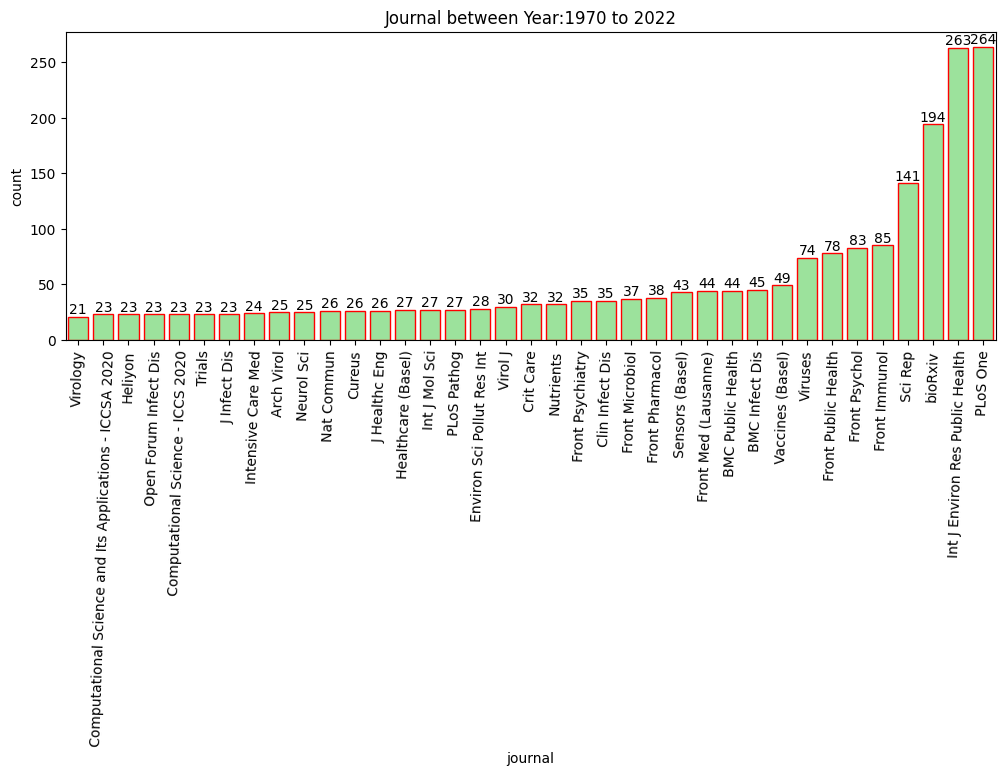

In [8]:
a = df.groupby('journal').filter(lambda x: len(x) > 20)
order = a.journal.value_counts(ascending=True).index

plt.figure(figsize=(12,4))
bx = sns.countplot(data=a, color='lightgreen', edgecolor='red', order=order, x='journal') 
bx.bar_label(bx.containers[0])
bx.tick_params(axis='x', rotation=88)
plt.title('Journal between Year:' + str(start_year) + ' to ' + str(end_year))
plt.show()

# Map-Reduce 

In [9]:
from map_reduce import *

In [10]:
# input
num_top_filtered = 50
num_top_unfilter = 50

metadata_path = os.path.join(data_root, 'meta_10k.csv')

In [11]:
documents_MR = load_documents_mr(metadata_path)

sorted_words, sorted_words_unfilter = map_reduce(documents_MR)

# Get the top 50 prevalent words
top_filtered = sorted_words[:num_top_filtered]
top_unfilter = sorted_words_unfilter[:num_top_unfilter]

In [12]:
# Step 6.1: Print the table of the top 50 prevalent words without stop words list
print(f"Top {num_top_unfilter} Prevalent Words without stopwords:")
print(f"{'ID':<4}{'Word':<20}{'Count'}")
print("-----------------------------")
for idx, (word, count) in enumerate(top_unfilter, start=1):
   print(f"{idx:<4}{word:<20}{count}")
print("\n"+"\n")

Top 50 Prevalent Words without stopwords:
ID  Word                Count
-----------------------------
1   the                 97935
2   of                  75152
3   and                 71142
4   in                  46376
5   to                  40334
6   a                   30698
7   with                20595
8   for                 19646
9   is                  12786
10  were                12217
11  that                11841
12  on                  11311
13  was                 11006
14  covid-19            10343
15  this                10102
16  as                  10067
17  we                  9942
18  by                  9331
19  from                8221
20  are                 7789
21  patients            7203
22  an                  7006
23  be                  6202
24  study               5251
25  or                  5157
26  at                  5110
27  have                4582
28  during              4384
29  health              4244
30  has                 4039
31  these   

In [13]:
# Step 6.2: Print the table of the top 50 prevalent words with IDs
print(f"Top {num_top_filtered} Prevalent Words:")
print(f"{'ID':<4}{'Word':<20}{'Count'}")
print("-----------------------------")
for idx, (word, count) in enumerate(top_filtered, start=1):
    print(f"{idx:<4}{word:<20}{count}")

Top 50 Prevalent Words:
ID  Word                Count
-----------------------------
1   covid-19            10343
2   patients            7203
3   study               5251
4   health              4244
5   data                3600
6   disease             3458
7   sars-cov-2          3371
8   clinical            2962
9   pandemic            2923
10  infection           2803
11  respiratory         2490
12  results             2486
13  associated          2484
14  coronavirus         2449
15  risk                2438
16  virus               2395
17  analysis            2342
18  viral               2192
19  model               2127
20  severe              2101
21  results:            1971
22  care                1970
23  different           1937
24  new                 1911
25  human               1886
26  social              1876
27  treatment           1847
28  however,            1844
29  based               1820
30  research            1806
31  high                1806
32  methods:    

# Similarity Analysis

In [14]:
from scipy.stats import *
from similarity_analysis import *

In [15]:
# pick a target document to compare
target_doc_num = 0

# input feature size (number of token used)
feature_size = 2**12

random.seed(10)

In [16]:
# Label the document is the target or not
df['doc_type'] = 'other documents'
df.at[target_doc_num,'doc_type'] = 'target document'

In [17]:
# Define characteristic matrix by tokenizing the processed text

# Build feature with token count
count_vectorizer = CountVectorizer(max_features=feature_size)
X_count = count_vectorizer.fit_transform(df['processed_text'].values).toarray().T

# Clip count between 0 and 1 to only consider the token exists in document or not
X_clip = np.clip(X_count, 0, 1)

# Use TF-IDF as feature to only consider interseting words
tfidf_vectorizer = TfidfVectorizer(max_features=feature_size)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'].values).toarray().T

In [18]:
count_result = check_document_similarity(X_count,df,target_doc_num)
clip_result = check_document_similarity(X_clip,df,target_doc_num)
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

## MinHash

Using token occurrence as document feature. Create a signature matrix using MinHash.
Compare the signature Jaccard similarity with the document L1 Norm (Hamming distance).

In [19]:
# Input to test the minhash performance
num_perm_list = list(range(50,200+1,50))

In [20]:
permutation_dict = minhash_with_different_permutation(df,X_clip,clip_result,target_doc_num,num_perm_list)
minhash_fine_turn_result = compare_minhash_fine_tune(permutation_dict)
minhash_fine_turn_result

,num_perm,correlation,pvalue
3,200,0.128771,4.439326e-31
2,150,0.430259,0.000000e+00
1,100,0.406207,3.557958e-317
0,50,0.247909,6.764643e-113


Text(0.5, 0.98, 'MinHash with 150 Permutations')

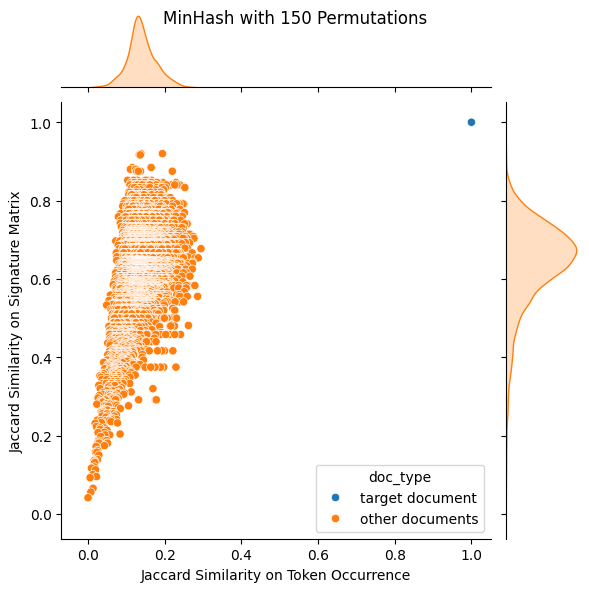

In [24]:
optimal_perm_num = int(minhash_fine_turn_result.sort_values(by=['correlation'],ascending=False).head(1)['num_perm'].values)
minhash_result = permutation_dict[optimal_perm_num]

sns.jointplot(
    data=minhash_result,
    x='doc_jaccard_similarity',
    y='sig_jaccard_similarity',
    hue='doc_type'
).set_axis_labels(
    xlabel='Jaccard Similarity on Token Occurrence',
    ylabel='Jaccard Similarity on Signature Matrix'
).figure.suptitle(
    f'MinHash with {optimal_perm_num} Permutations'
)

In [25]:
minhash_result[['doc_num','sig_jaccard_similarity','abstract_summary','doc_type']].head(10)

,doc_num,sig_jaccard_similarity,abstract_summary,doc_type
0,0,1.000000,Coronavirus disease 2019 caused by the severe ...,target document
1316,1316,0.920000,High volumes of sedentary behaviour are associ...,other documents
3221,3221,0.920000,"In the COVID-19 scenario, patients undergoing ...",other documents
2214,2214,0.916667,The PRoteomics IDEntifications (PRIDE) databas...,other documents
58,58,0.916667,The aims of the present study were to determin...,other documents
7337,7337,0.884615,The widespread use of face masks by the genera...,other documents
2754,2754,0.884615,"Coronavirus disease , the ongoing global pande...",other documents
4520,4520,0.880000,The sudden lockdown recovers the health of the...,other documents
4765,4765,0.880000,The aim of the present study is to develop the...,other documents
1648,1648,0.880000,The estimation of evolutionary parameters prov...,other documents


## SimHash

Using TF-IDF as document feature. Create a signature matrix using SimHash.
Compare the signature Hamming distance with the document cosine similarity.

In [26]:
tfidf_feature_list = list(tfidf_vectorizer.get_feature_names_out())

feature_hash_md5 = get_feature_hash(tfidf_feature_list,'md5')
finger_print_list_md5 = get_finger_print_list(X_tfidf,feature_hash_md5)

feature_hash_sha1 = get_feature_hash(tfidf_feature_list,'sha1')
finger_print_list_sha1 = get_finger_print_list(X_tfidf,feature_hash_sha1)

In [27]:
# Check Performance
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

md5 = check_simhash_similarity(finger_print_list_md5,target_doc_num)
md5 = tfidf_result.merge(md5,how='outer',on='doc_num')
md5 = md5.sort_values(by=['sig_hamming_distance'],ascending=True)

sha1 = check_simhash_similarity(finger_print_list_sha1,target_doc_num)
sha1 = tfidf_result.merge(sha1,how='outer',on='doc_num')
sha1 = sha1.sort_values(by=['sig_hamming_distance'],ascending=True)

if pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']).statistic < pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']).statistic:
    simhash_result = md5
else:
    simhash_result = sha1

PearsonRResult(statistic=-0.47784430740398315, pvalue=0.0)


Text(0.5, 0.98, 'SimHash with MD5')

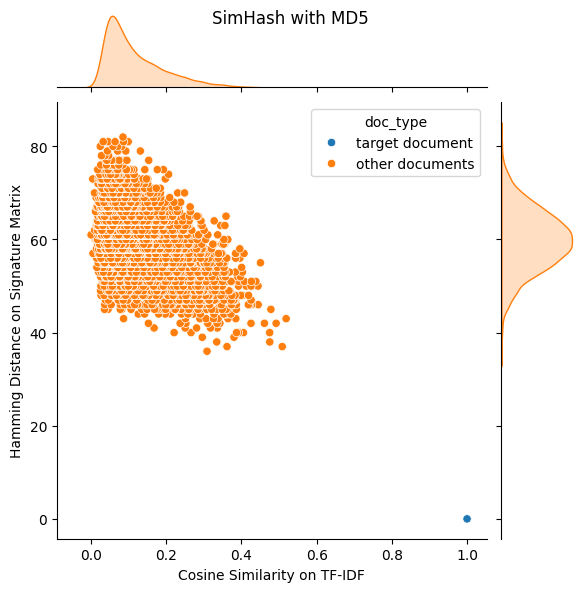

In [28]:
print(pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']))

sns.jointplot(
    data=md5,
    x='doc_cosine_similarity',
    y='sig_hamming_distance',
    hue='doc_type'
).set_axis_labels(
    xlabel='Cosine Similarity on TF-IDF',
    ylabel='Hamming Distance on Signature Matrix'
).figure.suptitle(
    'SimHash with MD5'
)

PearsonRResult(statistic=-0.5875183534537242, pvalue=0.0)


Text(0.5, 0.98, 'MinHash with SHA1')

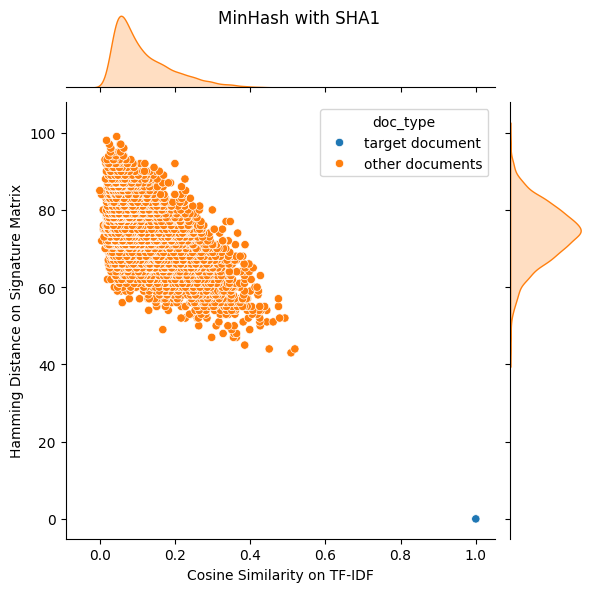

In [30]:
print(pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']))

sns.jointplot(
    data=sha1,
    x='doc_cosine_similarity',
    y='sig_hamming_distance',
    hue='doc_type'
).set_axis_labels(
    xlabel='Cosine Similarity on TF-IDF',
    ylabel='Hamming Distance on Signature Matrix'
).figure.suptitle(
    'MinHash with SHA1'
)

In [31]:
simhash_result[['doc_num','sig_hamming_distance','abstract_summary','doc_type']].head(10)

,doc_num,sig_hamming_distance,abstract_summary,doc_type
0,0,0,Coronavirus disease 2019 caused by the severe ...,target document
470,470,43,The rapid development of coronavirus disease-1...,other documents
6109,6109,44,"Since the beginning of the pandemic, numerous ...",other documents
4293,4293,44,To examine whether patients with inflammatory ...,other documents
6968,6968,45,Coronavirus disease 2019 (COVID-19) is a curre...,other documents
1232,1232,47,BACKGROUND Increases in cardiac troponin (cTn)...,other documents
753,753,47,"Background: , which is a disease caused by the...",other documents
5694,5694,47,"Citation: Wendt, R.; Lingitz, M.-T.; Laggner, ...",other documents
3030,3030,48,"In this study, we present our clinical severe ...",other documents
7201,7201,48,The following brief editorial is designed to s...,other documents


## Doc2Vec

Word2Vec also need to consider token position for word embeding. Use the original text instead of the processed text for vectorization.

In [32]:
# Use pretrained model to tokenize the documents.
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [33]:
# Use abstract summary instaed of body_test since it has less tokens.
# The abstract_summary field is a truncated version of the abstract.
# If the document has no abstract, the truncated version of body_text is used.
# This field is not processed in stopwords removal to maintain the semantic meaning.

original_docs = list(df['abstract_summary'])
tagged_docs = tag_documents(tokenizer,original_docs)

In [34]:
model = Doc2Vec()
model.build_vocab(tagged_docs)
model.train(tagged_docs,total_examples=model.corpus_count,epochs=20)

doc2vec_result = get_doc2vec_result(model,tokenizer,original_docs,target_doc_num,df)
doc2vec_result[['doc_num','doc2vec_similarity','abstract_summary','doc_type']].head(10)

,doc_num,doc2vec_similarity,abstract_summary,doc_type
0,0,0.884941,Coronavirus disease 2019 caused by the severe ...,target document
1,6928,0.637644,"As a crucial organ, the lung is exposed to var...",other documents
2,3573,0.633596,COVID-19 outburst initiated from the city of W...,other documents
3,4980,0.631569,"The newly emerged coronavirus, which was desig...",other documents
4,144,0.630821,HIV-related diarrhoea is an important cause of...,other documents
5,3778,0.625580,"In December 2019, an outbreak of viral pneumon...",other documents
6,5909,0.623689,"Citation: Ramos-Gomez, F.; Marcus, M.; Maida, ...",other documents
7,1234,0.618445,"Salvia miltiorrhiza Bunge, known as Danshen in...",other documents
8,7262,0.617982,The COVID-19 pandemic has caused many undesira...,other documents
9,7408,0.615952,Medicinal plants have been widely used to trea...,other documents


## Comparsion

Comparing the performance of different document similarity search methods with the cosine similarity of document with TF-IDF word embeding.

In [35]:
combine_result = get_combined_similarity_result(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_df = get_performance_rank(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_diff_df = get_performance_rank_diff(rank_df)

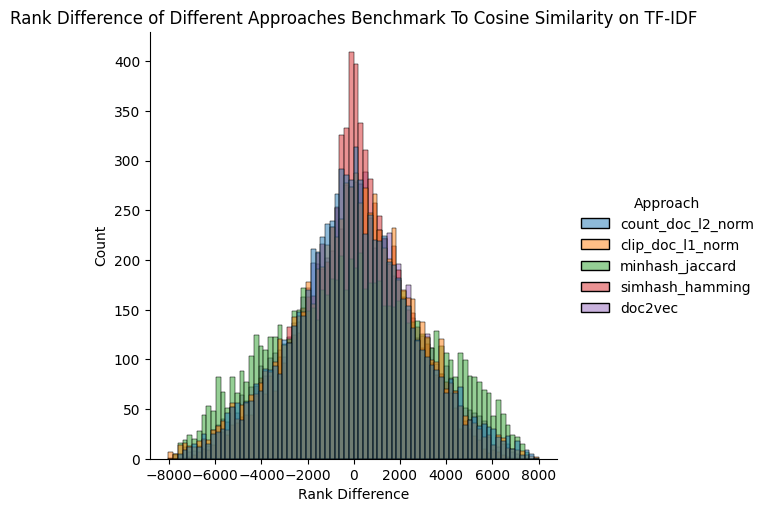

In [36]:
plot_df = rank_diff_df.drop(columns=['doc_num']).melt()
plot_df = plot_df.rename(columns={'value':'Rank Difference','variable':'Approach'})

sns.displot(
    plot_df,
    x='Rank Difference',
    hue='Approach'
).set(
    title='Rank Difference of Different Approaches Benchmark To Cosine Similarity on TF-IDF'
)

In [37]:
var_rank_diff = rank_diff_df.drop(columns=['doc_num']).var(axis=0)
var_rank_diff = var_rank_diff.reset_index().rename(columns={'index':'metric',0:'variance'})
var_rank_diff = var_rank_diff.sort_values(by=['variance'],ascending=True)
var_rank_diff

,metric,variance
3,simhash_hamming,5.343457e+06
4,doc2vec,7.177554e+06
0,count_doc_l2_norm,7.207272e+06
1,clip_doc_l1_norm,7.332088e+06
2,minhash_jaccard,1.100788e+07


# Association Analysis

In [38]:
from association_analysis import *

In [39]:
# Input, can be word that is not in feature but in model
target_word_list = ['vaccine', 'pandemic', 'respiratory']

In [40]:
token_list = list(count_vectorizer.get_feature_names_out())

if len(target_word_list) > 0:
    index_dict = get_target_document_index(X_count,token_list,target_word_list)
    interested_list = list()
    for key in index_dict:
        interested_list += index_dict[key]
    print('Number of interested document: ',len(interested_list))
    interested_df = df.iloc[interested_list]

Looking for most related documents...
Using Model: glove-wiki-gigaword-100

Token not in model: 8/4096 (0.2%)
Comparing target word 1/3: vaccine
Comparing target word 2/3: pandemic
Comparing target word 3/3: respiratory


Number of interested document:  300


## Association Rule (LDA)

In [41]:
import gensim.corpora as corpora
import pyLDAvis.gensim_models
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pywong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Set number of topics
num_topics = 4

In [43]:
# Create Dictionary
id2word = corpora.Dictionary(interested_df['all_text_list'])
# Create Corpus
texts = interested_df['all_text_list']
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=42, passes=10, alpha='auto', per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=interested_df['all_text_list'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)


Coherence Score:  0.331080361285509


## Wordcloud

In [44]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

In [45]:
# Prepare Wordcloud of Top N words in each topic

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
    width=4000,
    height=2000,
    max_words=10,
    prefer_horizontal=1.0,
    background_color='whitesmoke'
)

topics = lda_model.show_topics(formatted=False)
# Print the keywords for each topic
print(lda_model.print_topics())
print(lda_model.top_topics)

[(0, '0.005*"health" + 0.005*"study" + 0.004*"data" + 0.004*"magnetic" + 0.003*"participants" + 0.003*"research" + 0.003*"time" + 0.003*"based" + 0.003*"support" + 0.003*"students"'), (1, '0.006*"research" + 0.006*"study" + 0.005*"data" + 0.005*"suicide" + 0.004*"career" + 0.004*"values" + 0.004*"expenditure" + 0.003*"financial" + 0.003*"self" + 0.003*"different"'), (2, '0.008*"data" + 0.006*"model" + 0.005*"number" + 0.005*"results" + 0.005*"based" + 0.004*"different" + 0.004*"information" + 0.004*"set" + 0.004*"models" + 0.004*"time"'), (3, '0.005*"model" + 0.004*"market" + 0.004*"data" + 0.004*"time" + 0.004*"efficiency" + 0.004*"based" + 0.004*"different" + 0.003*"energy" + 0.003*"geographic" + 0.003*"cost"')]
<bound method LdaModel.top_topics of <gensim.models.ldamodel.LdaModel object at 0x000001BBDE476C00>>


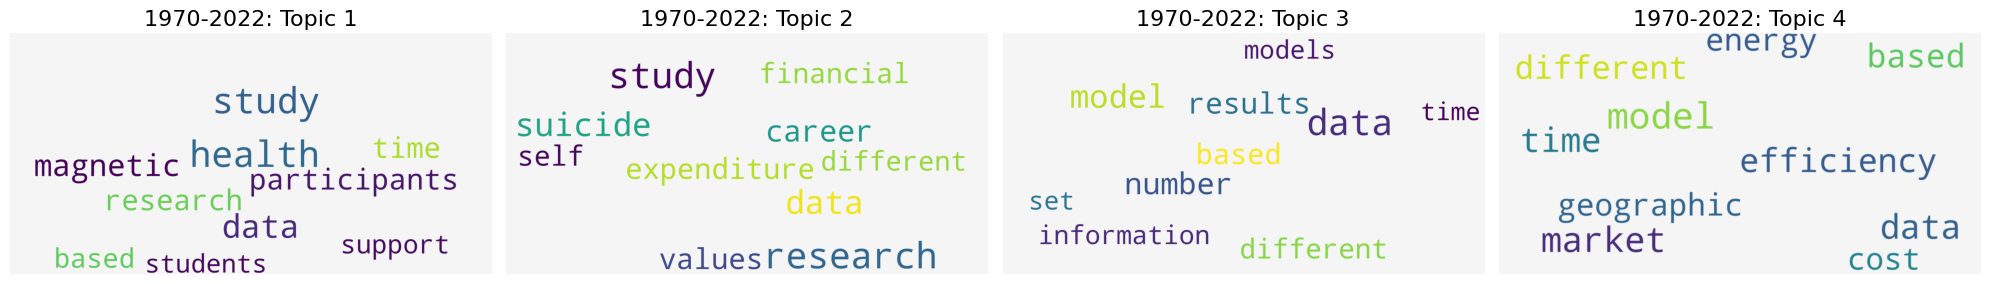

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.072792 -0.104306       1        1  27.351838
2     -0.096299  0.092807       2        1  26.722950
1      0.112467  0.012418       3        1  25.301848
0      0.056623 -0.000919       4        1  20.623365, topic_info=             Term         Freq        Total Category  logprob  loglift
4392      suicide   906.000000   906.000000  Default  30.0000  30.0000
4464       career   746.000000   746.000000  Default  29.0000  29.0000
1877  expenditure   690.000000   690.000000  Default  28.0000  28.0000
5728     magnetic   554.000000   554.000000  Default  27.0000  27.0000
341        health  1177.000000  1177.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
33       analysis   323.487890  1683.950728   Topic4  -6.1408  -0.0710
494        number   317.926959  1818.137795   Topic4  -6.1581  -0.1650
1104  information   290.596863  1660.163104   Topic4  -6.2480  -0.1640
756       studies   278.501797  1248.978947   Topic4  -6.2905   0.0781
772        system   272.052573  1430.473332   Topic4  -6.3140  -0.0810

[357 rows x 6 columns], token_table=       Topic      Freq         Term
term                               
18027      1  0.008084     abortion
18027      3  0.008084     abortion
18027      4  0.986228     abortion
2551       1  0.005768        abuse
2551       2  0.023071        abuse
...      ...       ...          ...
836        2  0.226781         work
836        3  0.276965         work
836        4  0.137212         work
13881      1  0.978827  worldmaking
13881      2  0.015059  worldmaking

[925 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

In [46]:
fig, axes = plt.subplots(1, num_topics, figsize=(20,20), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    
    plt.gca().imshow(cloud)
    plt.gca().set_title(str(start_year) + '-' + str(end_year) + ': Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.imshow(cloud, interpolation='bilinear')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()
vis

## Prepare for Association Mining 

In [47]:
# Input for association mining
min_support = 0.6
mine_col = 'all_text_list'

In [48]:
# Pre-processing
te = TransactionEncoder()
te_ary = te.fit (interested_df[mine_col]).transform(interested_df[mine_col])
df_processd_text = pd.DataFrame (te_ary, columns=te.columns_)
print(df_processd_text)

       aag  abandon  abandoned  abandoning  abandonment  abarca  abatement  \
0    False    False       True       False         True   False      False   
1    False    False      False       False        False   False      False   
2    False    False      False       False        False   False      False   
3    False    False      False       False        False   False      False   
4    False    False      False       False        False   False      False   
..     ...      ...        ...         ...          ...     ...        ...   
295  False    False      False       False        False   False      False   
296  False    False      False       False        False   False      False   
297  False    False      False       False        False   False      False   
298  False    False      False       False        False   False      False   
299  False    False      False       False        False   False      False   

     abbreviate  abbreviation  abbreviations  ...  zipper   zon

## Association Rule (FP Growth)

In [49]:
from mlxtend.frequent_patterns import fpgrowth

    support     itemsets
0  0.896667  (different)
1  0.860000      (based)
2  0.846667       (data)
3  0.840000      (study)
4  0.840000     (number)
                     antecedents                 consequents   support  \
2600  (number, important, based)                 (time, new)  0.623333   
2613                 (time, new)  (number, important, based)  0.623333   
4682          (based, following)            (important, new)  0.620000   
4683            (important, new)          (based, following)  0.620000   
4680      (important, following)                (new, based)  0.620000   
...                          ...                         ...       ...   
6267                 (different)               (significant)  0.660000   
6643                       (non)                 (different)  0.626667   
6642                 (different)                       (non)  0.626667   
1573                  (analysis)                 (important)  0.676667   
1572                 (important)    

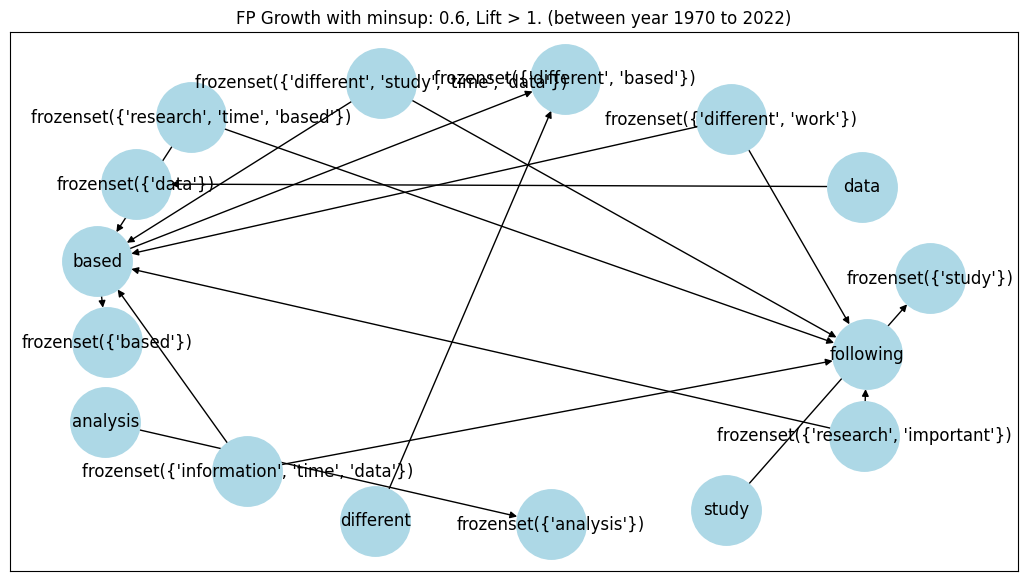

In [50]:
frq_items_fp = fpgrowth(df_processd_text, min_support=min_support, use_colnames=True)
print(frq_items_fp.head())
rules_fp = find_association_rules(frq_items_fp)
print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

if len(rules_fp) > 0:
    #draw_catgraph (rules_fp, 10, topics, 'FP Growth with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')
    draw_graph (rules_fp, 5, topics, 'FP Growth with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')

## Association Rule (Apriori Algorithm)

    support      itemsets
0  0.616667   (according)
1  0.650000    (addition)
2  0.806667    (analysis)
3  0.636667    (approach)
4  0.640000  (associated)
                     antecedents                 consequents   support  \
7550  (number, important, based)                 (time, new)  0.623333   
7563                 (time, new)  (number, important, based)  0.623333   
5210          (based, following)            (important, new)  0.620000   
5211            (important, new)          (based, following)  0.620000   
5208      (important, following)                (new, based)  0.620000   
...                          ...                         ...       ...   
281                  (different)               (significant)  0.660000   
253                        (non)                 (different)  0.626667   
252                  (different)                       (non)  0.626667   
17                    (analysis)                 (important)  0.676667   
16                   (importan

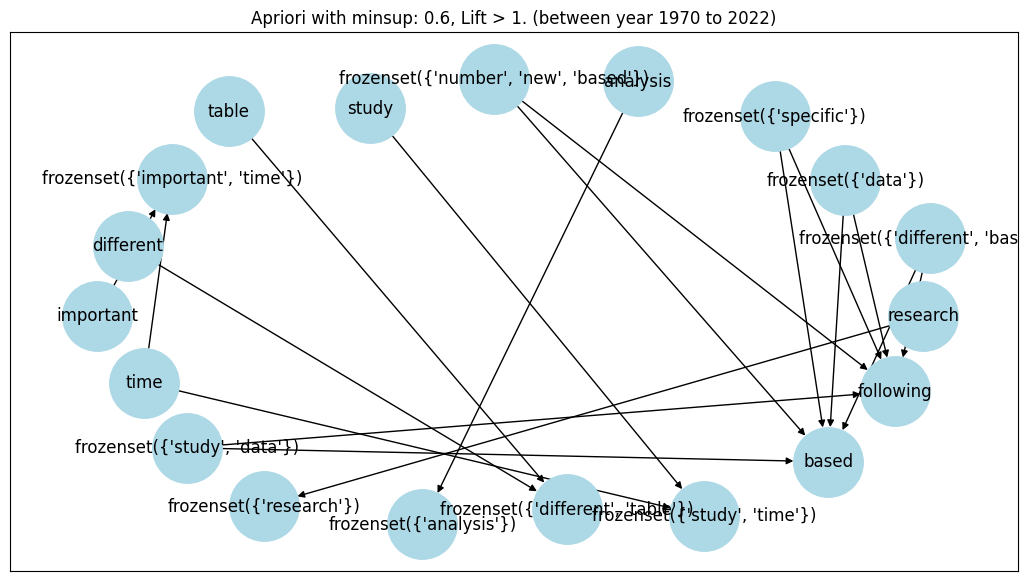

In [51]:
# Building the model 
frq_items_ap = apriori(df_processd_text, min_support = min_support, use_colnames = True) 
print(frq_items_ap.head())
rules_ap = find_association_rules(frq_items_ap)
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

if len(rules_ap) > 0:
    #draw_catgraph (rules_ap, 10, topics, 'Apriori with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')
    draw_graph (rules_ap, 5, topics, 'Apriori with minsup: ' + str(min_support) + ', Lift > 1. (between year ' + str(start_year) + ' to ' + str(end_year) + ')')

# Clustering Analysis

In [52]:
from clustering_analysis import *

In [53]:
text = tfidf_vectorizer.fit_transform(df['processed_text'])

  (0, 3687)	0.03264793643597637
  (0, 1895)	0.06631126483182495
  (0, 828)	0.043027295443433033
  (0, 1091)	0.08088111897005339
  (0, 489)	0.011029642023709721
  (0, 3385)	0.07647091226008522
  (0, 62)	0.05358601636210423
  (0, 3206)	0.0526068104693678
  (0, 3680)	0.047209448448613446
  (0, 3221)	0.01794927571538411
  (0, 1896)	0.1484656456302934
  (0, 3211)	0.028466457277925263
  (0, 1928)	0.07838750819452048
  (0, 67)	0.037484751999323315
  (0, 1796)	0.051886799881839925
  (0, 3684)	0.025958979194345606
  (0, 2065)	0.02885634649232761
  (0, 900)	0.1080375167132975
  (0, 3131)	0.1284501683119018
  (0, 2535)	0.015009895163549346
  (0, 1805)	0.022461792693265314
  (0, 159)	0.021465394013746964
  (0, 3695)	0.014152087291835437
  (0, 2730)	0.013373955343414127
  (0, 2893)	0.09365366473692872
  :	:
  (4, 2521)	0.027136753057826726
  (4, 3998)	0.031243491813237583
  (4, 1740)	0.036434460740039386
  (4, 1904)	0.015470132386712658
  (4, 3781)	0.03200594821024346
  (4, 4009)	0.0355501295091507

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


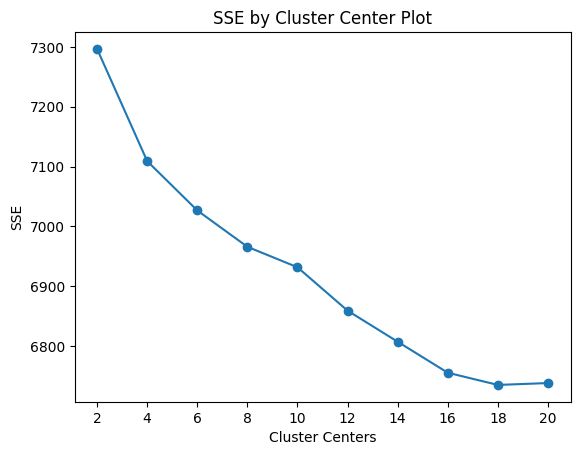

In [54]:
find_optimal_clusters(text, 20)

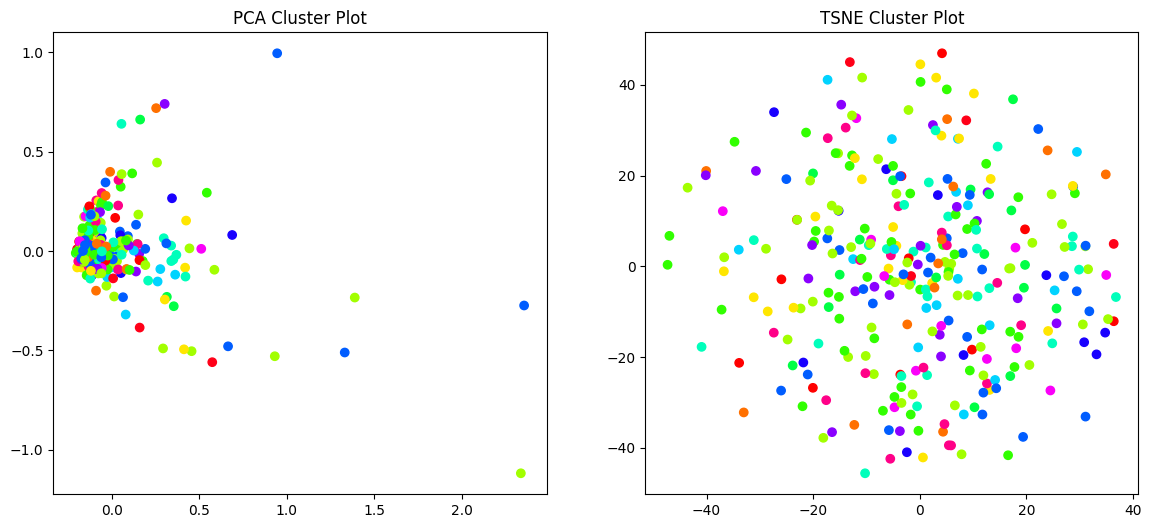

In [55]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
plot_tsne_pca(text, clusters, X_tfidf)

In [56]:
get_top_keywords(text, clusters, tfidf_vectorizer.get_feature_names_out(), 10)


Cluster 0
antibodies,study,sars,immune,patients,dose,vaccinated,vaccines,vaccination,vaccine

Cluster 1
sars,cells,docking,rbd,structure,compounds,residues,proteins,binding,protein

Cluster 2
children,viral,asymptomatic,study,respiratory,symptoms,cases,infection,sars,patients

Cluster 3
research,healthcare,services,social,patient,public,pandemic,patients,care,health

Cluster 4
performance,study,different,network,based,number,models,time,data,model

Cluster 5
clinical,disease,hospital,data,studies,icu,risk,study,mortality,patients

Cluster 6
women,depression,stress,pandemic,mental,anxiety,study,social,health,participants

Cluster 7
gene,species,samples,viral,sequence,genome,strains,viruses,sequences,virus

Cluster 8
severe,infection,respiratory,therapy,clinical,disease,study,treatment,patient,patients

Cluster 9
cell,mers,patients,protein,infection,virus,cells,viral,cov,sars

Cluster 10
proteins,immune,viral,virus,mice,infection,protein,expression,cell,cells

Cluster 11
schools,medical

## DBScan

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

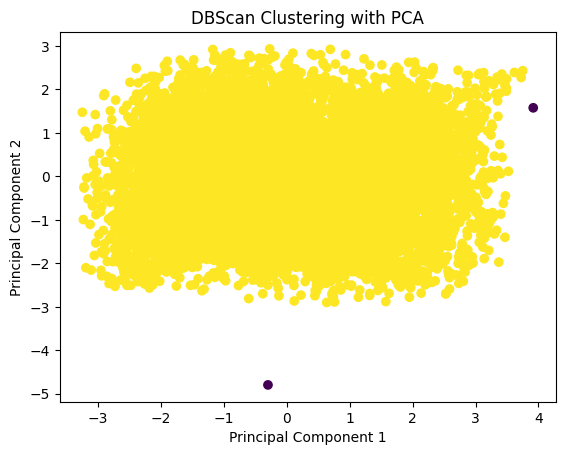

In [64]:
cluster_df = df.copy()

# Remove columns that is a list or anything this is not useful
for column in cluster_df.columns:
    if column in ['doc_num','publish_time'] or (re.match(r'[a-z_]*_list$',column) is not None):
        cluster_df = cluster_df.drop(columns=[column])
        
        
# Convert string columns to numerical values using LabelEncoder
label_encoder = LabelEncoder()

for column in cluster_df.columns:       
    if cluster_df[column].dtype == 'object':
        cluster_df[column] = label_encoder.fit_transform(cluster_df[column])

# Apply PCA to reduce the dimensionality
scaler = StandardScaler()
df_scaled = scaler.fit_transform(cluster_df)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Perform DBScan clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(df_pca)

# Add the cluster labels to the DataFrame
cluster_df['cluster'] = clusters

# Plot the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBScan Clustering with PCA')
plt.show()

## K-Distance

In [65]:
from sklearn.neighbors import NearestNeighbors

Text(0.5, 1.0, 'K-Distance Graph')

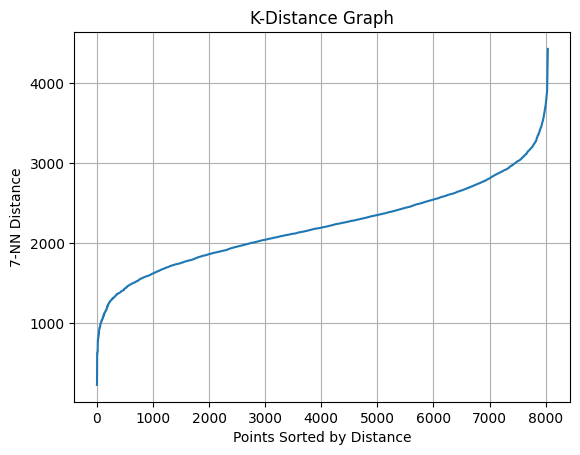

In [66]:
# Feature use title
m1 = cluster_df.drop(columns = ['title']).values

knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(m1)
distances, indices = knn.kneighbors(m1)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.grid()
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

## Hierarchical Clustering

In [67]:
from scipy.cluster.hierarchy import dendrogram, linkage

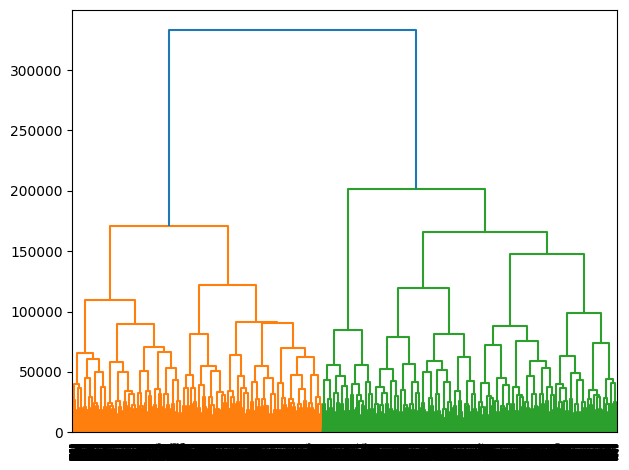

In [68]:
# Feature use Journal
m1 = cluster_df.drop(columns = ['journal']).values
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

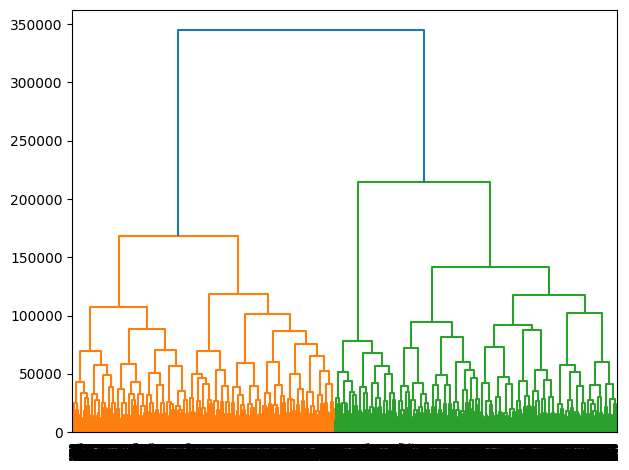

In [69]:
# Feature use title
m1 = cluster_df.drop(columns = ['title']).values
linkage_data = linkage(m1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

# Knowledge Discovery

In [70]:
from knowledge_discovery import *

In [71]:
# Input dataframe with topic and labels for classification
topic_df = pd.DataFrame({
    'topic':['severity','illness','contagious','symptom'],
    'labels':[
        ['mild','serious'],
        ['acute','chronic'],
        ['transmissible','noninfectious'],
        ['detectable','undetectable']
    ]
})

topic_list = topic_df['topic'].unique()

topic_df

,topic,labels
0,severity,"[mild, serious]"
1,illness,"[acute, chronic]"
2,contagious,"[transmissible, noninfectious]"
3,symptom,"[detectable, undetectable]"


In [72]:
# Filter most related documents on a topic.
# Use zero-shot classification to give a label on those documents.
insight_df = get_document_zero_shot_classifiaction(X_count,df,token_list,topic_df)
insight_df.head(5)

Looking for most related documents...
Using Model: glove-wiki-gigaword-100

Token not in model: 8/4096 (0.2%)
Comparing target word 1/4: severity
Comparing target word 2/4: illness
Comparing target word 3/4: contagious
Comparing target word 4/4: symptom


Zero shot classification in progress...
Using Model: facebook/bart-large-mnli
Classification on topic: 'severity' into ['mild', 'serious'] (1/4)
Classification on topic: 'illness' into ['acute', 'chronic'] (2/4)
Classification on topic: 'contagious' into ['transmissible', 'noninfectious'] (3/4)
Classification on topic: 'symptom' into ['detectable', 'undetectable'] (4/4)




,doc_num,topic,label,score
14,272,severity,mild,0.639342
48,902,severity,mild,0.535576
50,915,severity,mild,0.524787
57,1145,severity,mild,0.591189
58,1177,severity,mild,0.512367


In [73]:
summary = pd.pivot_table(
    insight_df,
    index = ['topic','label'],
    values = ['doc_num','score'],
    aggfunc = {'doc_num':'count','score':[np.mean,np.median]}
).reset_index()

summary

topic          label doc_num     score          
                               count      mean    median
0  contagious  transmissible     100  0.940648  0.949869
1     illness          acute      84  0.655373  0.643609
2     illness        chronic      16  0.593794  0.560722
3    severity           mild       8  0.603898  0.592803
4    severity        serious      92  0.827901  0.868031
5     symptom     detectable      99  0.978269  0.986335
6     symptom   undetectable       1  0.584287  0.584287

## Visualization

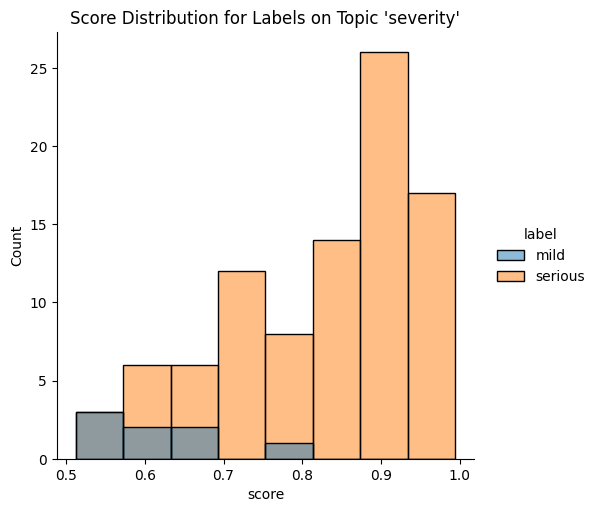

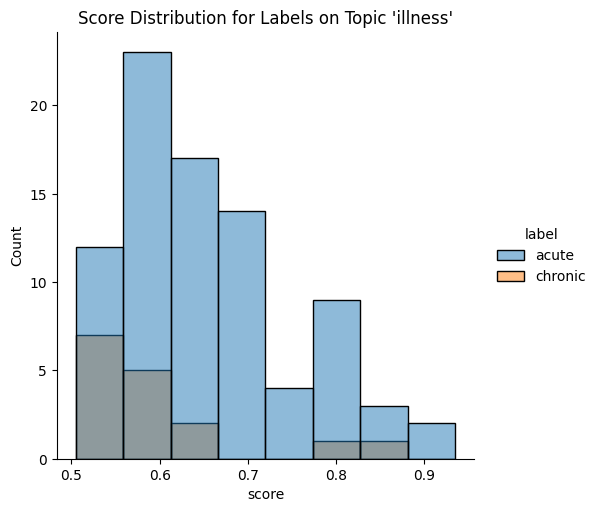

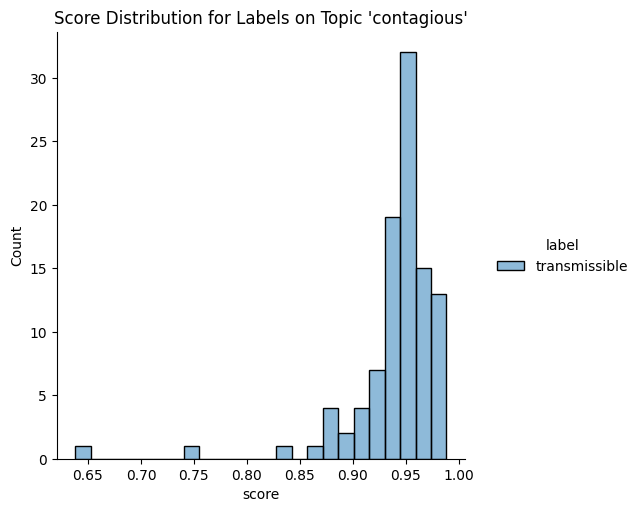

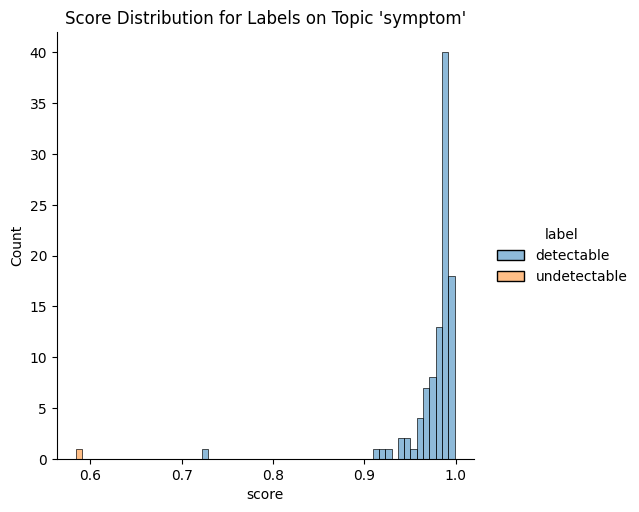

In [84]:
    
for i in range(0,len(topic_list)):
    
    topic = topic_list[i]
    # row_num = i // total_column
    # col_num = i % total_column # first column if i is odd, second column if i is even
    
    # Filter the dataframe on the given topic
    sub_df = insight_df[insight_df['topic']==topic]
    
    
    # fig, ax = plt.subplots(total_row, total_column)
    
    # Plot the score distribution for each label
    sns.displot(
        sub_df,
        x='score',
        hue='label',
        # kind='ecdf',
        # ax=ax[row_num, col_num]
    ).set(
        title=f"Score Distribution for Labels on Topic '{topic}'"
    )

plt.show()